In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
import plotly.graph_objs as go

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, precision_recall_curve, precision_score, recall_score,classification_report
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer


In [70]:
df = pd.read_csv('../Data/raw_df.csv')
df = df.drop_duplicates(keep='first').reset_index(drop=True)

DoS = list([
    'smurf', 'pod', 'neptune', 'teardrop', 'land', 'apache2', 
    'back', 'udpstorm', 'mailbomb', 'processtable'
])

U2R = list([

    'buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'xterm', 'ps', 
    'httptunnel', 'sqlattack', 'worm', 'snmpguess'
])

R2L = list([
    'guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster',
    'snmpgetattack',  'named', 'xlock', 'xsnoop', 'sendmail'
])

Probe = list([
    'portsweep', 'ipsweep', 'nmap', 'saint', 'satan', 'mscan'
])

for attack in Probe:
    df['deu_ruim_ou_nao']=df['deu_ruim_ou_nao'].str.replace(attack,'Probe')
    
for attack in DoS:
    df['deu_ruim_ou_nao']=df['deu_ruim_ou_nao'].str.replace(attack,'DoS')

for attack in U2R:
    df['deu_ruim_ou_nao']=df['deu_ruim_ou_nao'].str.replace(attack,'U2R')

for attack in R2L:
    df['deu_ruim_ou_nao']=df['deu_ruim_ou_nao'].str.replace(attack,'R2L')

In [71]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,deu_ruim_ou_nao
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,R2L
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,R2L
3,0,udp,private,SF,105,146,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,R2L
4,0,udp,domain_u,SF,29,0,0,0,0,0,...,3,0.3,0.30,0.30,0.0,0.0,0.0,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77286,0,icmp,ecr_i,SF,30,0,0,0,0,0,...,55,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal
77287,0,icmp,ecr_i,SF,30,0,0,0,0,0,...,56,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal
77288,0,udp,private,SF,105,105,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,R2L
77289,0,icmp,ecr_i,SF,30,0,0,0,0,0,...,67,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal


In [72]:
categorical_features = list(df.select_dtypes(include=['object']).columns)
numeric_features = list(df.select_dtypes(exclude=['object']).columns)

In [73]:
df_pp = df.copy()
for c in categorical_features:
    enc = LabelEncoder().fit(df_pp[c].values)
    enc_features = enc.transform(df_pp[c].values)
    df_pp[c] = enc_features

scaler = MinMaxScaler().fit(df_pp[numeric_features].values)
sc_features = scaler.transform(df_pp[numeric_features].values)
df_pp[numeric_features] = sc_features
    

In [74]:
X = df_pp.iloc[:,:-1]
y = df_pp.iloc[:,-1]

<h1> Mutual Info

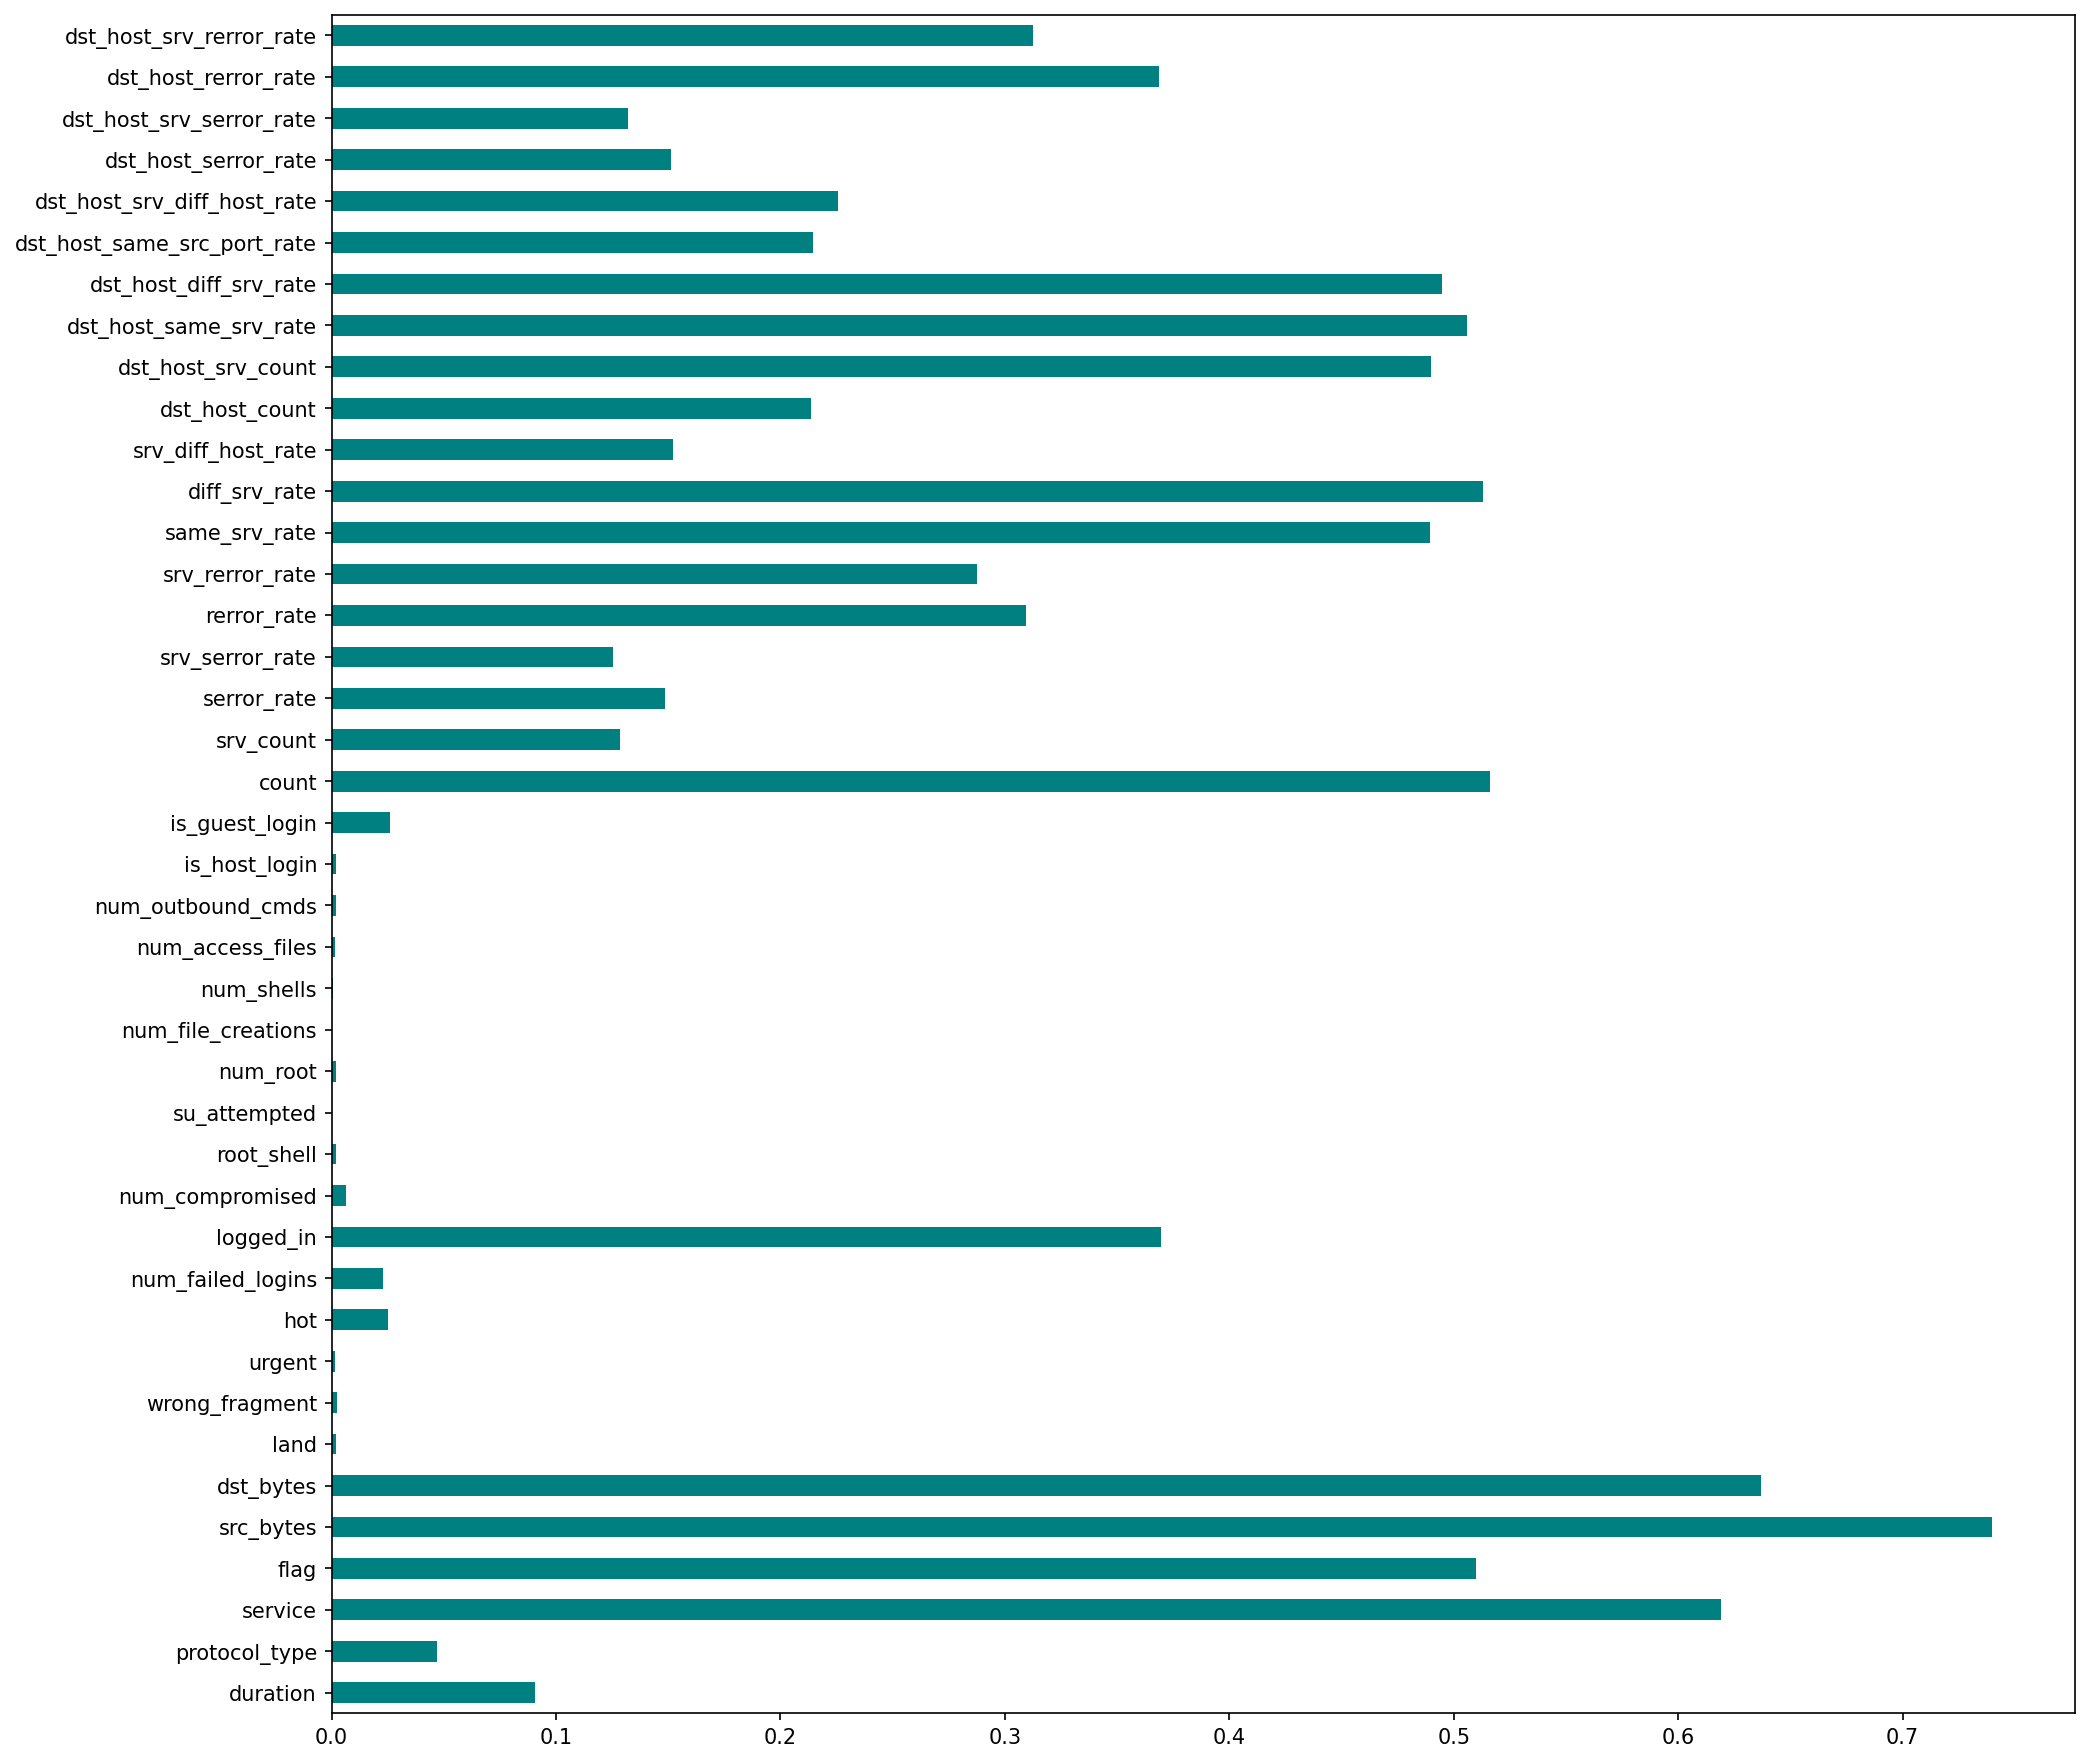

In [75]:
importances = mutual_info_classif(X,y)
feature_imp = pd.Series(importances, df_pp.columns[0:len(df_pp.columns)-1])
plt.figure(figsize=(15,15))
feature_imp.plot(kind = 'barh', color='teal')
plt.show()

In [76]:
MI_features = list(feature_imp.sort_values(ascending = False)[:20].index)

<h1> Correlation

<AxesSubplot:>

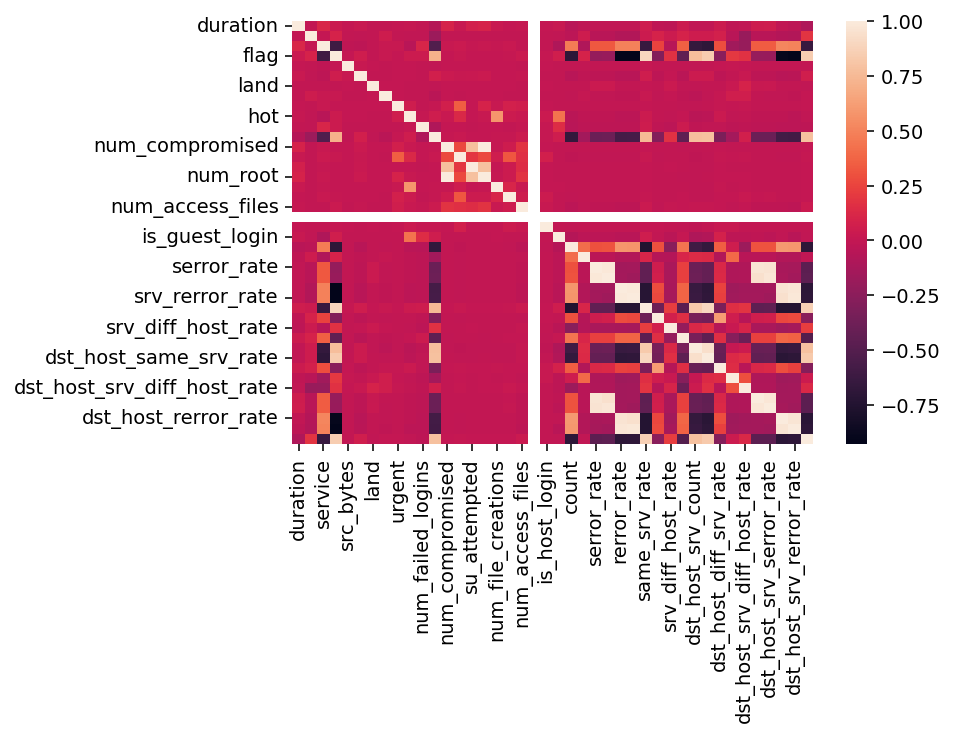

In [77]:
plt.rcParams['figure.dpi'] = 140
cor = df_pp.corr()
sns.heatmap(cor)

In [78]:
cor

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,deu_ruim_ou_nao
duration,1.000000,-0.007200,0.115985,0.032970,0.004821,0.024660,-0.000937,-0.002836,0.001864,0.007441,...,-0.009964,-0.009208,0.043403,-0.017353,-0.014254,0.049761,0.058449,-0.011585,-0.027098,-0.095085
protocol_type,-0.007200,1.000000,0.004888,0.093032,-0.002320,-0.012894,-0.001608,0.045256,-0.001565,-0.010053,...,0.047446,0.044814,0.081606,-0.050942,-0.193705,-0.050556,-0.049787,-0.074903,-0.077171,0.184281
service,0.115985,0.004888,1.000000,-0.606011,-0.016796,-0.026307,-0.007473,0.015837,0.019205,-0.048755,...,-0.654930,-0.690474,0.289379,-0.155310,-0.197475,0.339281,0.343141,0.513290,0.502824,-0.641154
flag,0.032970,0.093032,-0.606011,1.000000,0.005735,0.054579,-0.006772,0.020406,0.006562,0.039666,...,0.773250,0.835127,-0.258943,0.199318,0.172500,-0.201853,-0.190094,-0.899924,-0.924534,0.842339
src_bytes,0.004821,-0.002320,-0.016796,0.005735,1.000000,0.018730,-0.000145,-0.000382,-0.000046,0.003806,...,-0.009820,-0.004549,0.001176,0.011477,0.006491,-0.004434,-0.004329,-0.005498,-0.005520,-0.004901
dst_bytes,0.024660,-0.012894,-0.026307,0.054579,0.018730,1.000000,-0.000961,-0.002910,0.005976,0.007116,...,0.041086,0.041842,-0.024367,-0.006356,0.023660,-0.029062,-0.026863,-0.046212,-0.045370,0.063780
land,-0.000937,-0.001608,-0.007473,-0.006772,-0.000145,-0.000961,1.000000,-0.000353,-0.000113,-0.000728,...,-0.014866,-0.002429,-0.001577,0.023639,0.093018,0.020090,0.027399,-0.005677,-0.005590,-0.015281
wrong_fragment,-0.002836,0.045256,0.015837,0.020406,-0.000382,-0.002910,-0.000353,1.000000,-0.000343,-0.002205,...,-0.033301,-0.012543,0.012808,0.062127,0.061328,-0.004774,-0.010920,-0.011156,-0.016927,0.000170
urgent,0.001864,-0.001565,0.019205,0.006562,-0.000046,0.005976,-0.000113,-0.000343,1.000000,0.053433,...,-0.012150,-0.004805,0.011440,0.004583,0.010600,-0.002367,-0.003466,-0.004648,-0.000436,0.001914
hot,0.007441,-0.010053,-0.048755,0.039666,0.003806,0.007116,-0.000728,-0.002205,0.053433,1.000000,...,-0.040931,-0.030464,0.032761,-0.011788,-0.004446,-0.015856,-0.020854,-0.020349,-0.031958,-0.011042


In [79]:
CORR_features = list(abs(cor['deu_ruim_ou_nao']).sort_values(ascending=False)[:21].index)
CORR_features.remove('deu_ruim_ou_nao')
len(CORR_features)

20

<h1> RF feature importance

In [80]:
rf = RandomForestClassifier(n_estimators=200)

rf.fit(X,y)
rffi = rf.feature_importances_

In [81]:
features = pd.Series(rffi, df_pp.columns[0:len(df_pp.columns)-1])
RFFI_features = list(features.sort_values(ascending = False)[:20].index)

In [82]:
len(RFFI_features)

20

<h1> SHAP

In [83]:
X = df_pp.iloc[:,:-1]
y = df_pp.iloc[:,-1]

train_X, test_X, train_y, test_y = train_test_split(X,y, random_state=42)
rf = RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [84]:
row = 1
row_instance = test_X.iloc[row]  # use 1 row of data here. Could use multiple rows if desired
row_pred = row_instance.values.reshape(1, -1)

rf.predict_proba(row_pred)

C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([[0., 1., 0., 0., 0.]])

In [85]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(row_instance)

In [86]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], row_instance)

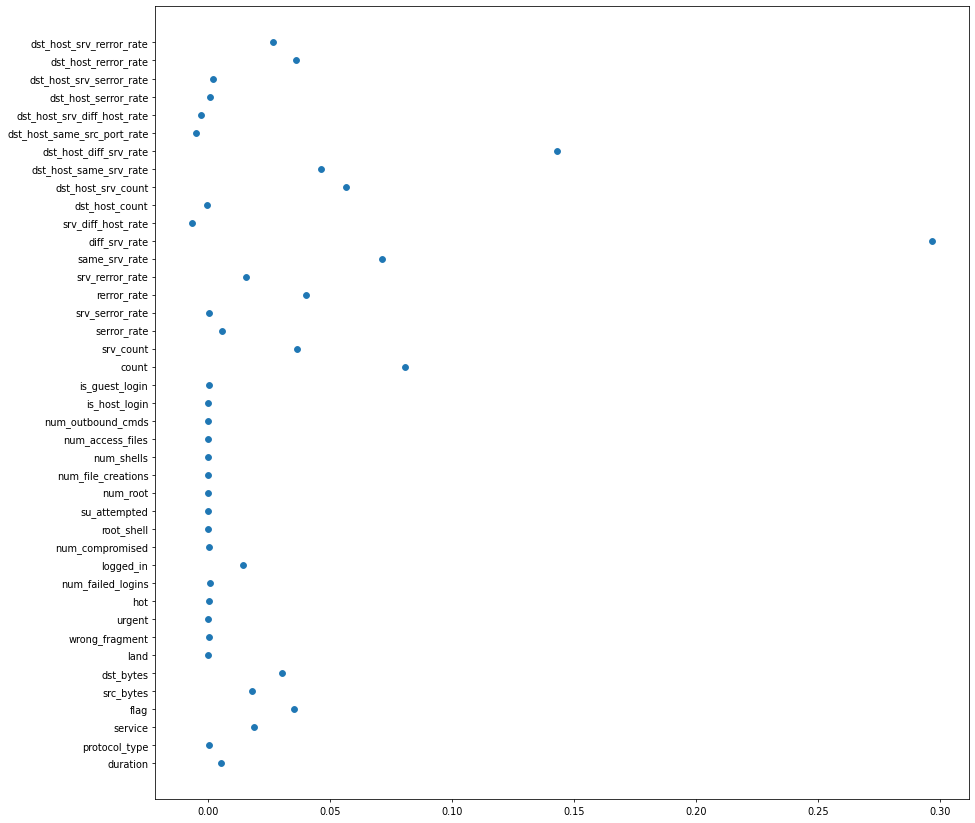

In [87]:
plt.rcParams['figure.dpi'] = 70

x = row_instance.index
y = shap_values[1]

plt.figure(figsize=(15,15))
plt.scatter(y,x)
plt.show()


In [88]:
shap_series_1 = pd.Series(y, x)
shap_features_1 = list(shap_series_1.sort_values(ascending = False)[:20].index)

In [89]:
shap_features_1

['diff_srv_rate',
 'dst_host_diff_srv_rate',
 'count',
 'same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'rerror_rate',
 'srv_count',
 'dst_host_rerror_rate',
 'flag',
 'dst_bytes',
 'dst_host_srv_rerror_rate',
 'service',
 'src_bytes',
 'srv_rerror_rate',
 'logged_in',
 'serror_rate',
 'duration',
 'dst_host_srv_serror_rate',
 'num_failed_logins']

In [90]:
def compute_shap_values(X, y,num_of_features):

    train_X, test_X, train_y, test_y = train_test_split(X,y, random_state=42)
    rf = RandomForestClassifier(random_state=42).fit(train_X.values, train_y.values)
    shap_df = pd.DataFrame()

    for target in list(test_y.value_counts().index):   
        i = []
        v = []

        for index, value in zip(range(len(test_y)), test_y):    
            i.append(index)
            v.append(value)
        
        y_val = pd.Series(v,i)
        y_val = list(y_val[y_val==target].index)

        idx_threshold = 5
        final_idx = []

        for idx in y_val:
            if idx_threshold > 0:
                row_instance = test_X.iloc[idx]
                row_pred = row_instance.values.reshape(1, -1)

                if float(rf.predict_proba(row_pred)[0][target]) == 1.0:
                    final_idx.append(idx)
                    idx_threshold = idx_threshold - 1
            else:
                break

        temp_df = pd.DataFrame()

        for idx in final_idx:
            row_instance = test_X.iloc[idx]
            row_pred = row_instance.values.reshape(1, -1)
            
            explainer = shap.TreeExplainer(rf)
            shap_values = explainer.shap_values(row_instance)

            series_idx = row_instance.index
            series_val = shap_values[target]

            feature_series = pd.Series(series_val, series_idx)
            
            shap_df_temp = feature_series.to_frame().rename(columns={0:'shap_value'}).rename_axis('features').reset_index()
            temp_df = temp_df.append(shap_df_temp, ignore_index = True)

        temp_df = temp_df.sort_values(by=['shap_value'], ascending=False).drop_duplicates(subset='features', keep='first')
        shap_df = shap_df.append(temp_df, ignore_index = True)    

    shap_df = shap_df.sort_values(by=['shap_value'], ascending=False).drop_duplicates(subset='features', keep='first')
    shap_df_features = list(shap_df['features'].iloc[:num_of_features])

    return shap_df_features
    

In [91]:
X = df_pp.iloc[:,:-1]
y = df_pp.iloc[:,-1]
shap_features = compute_shap_values(X, y,20)

<h1> Model performance

MI_features, CORR_features, RFFI_features, shap_features

In [92]:
def model_performance(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
    clf=RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()

    sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
    print(sk_report)

    performance_dictionary={'Class':[],'Accuracy':[],'F1_Score':[],'Precision':[],'Recall':[]}

    f1 = list(f1_score(y_test, y_pred, average=None))
    matrix = confusion_matrix(y_test, y_pred)
    acc = list(matrix.diagonal()/matrix.sum(axis=1))
    pr = list(precision_score(y_test, y_pred, average=None))
    rl = list(recall_score(y_test, y_pred, average=None))

    for i in range(len(f1)):

        performance_dictionary['Class'].append(i)
        performance_dictionary['Accuracy'].append(acc[i])
        performance_dictionary['F1_Score'].append(f1[i])
        performance_dictionary['Precision'].append(pr[i])
        performance_dictionary['Recall'].append(rl[i])

    df = pd.DataFrame.from_dict(performance_dictionary)

    return df

C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



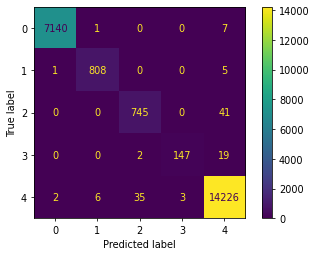

              precision    recall  f1-score   support

           0   0.999580  0.998881  0.999230      7148
           1   0.991411  0.992629  0.992020       814
           2   0.952685  0.947837  0.950255       786
           3   0.980000  0.875000  0.924528       168
           4   0.994964  0.996777  0.995870     14272

    accuracy                       0.994739     23188
   macro avg   0.983728  0.962225  0.972381     23188
weighted avg   0.994721  0.994739  0.994707     23188



,Class,Accuracy,F1_Score,Precision,Recall
0,0,0.998881,0.999230,0.999580,0.998881
1,1,0.992629,0.992020,0.991411,0.992629
2,2,0.947837,0.950255,0.952685,0.947837
3,3,0.875000,0.924528,0.980000,0.875000
4,4,0.996777,0.995870,0.994964,0.996777


In [93]:
X=df_pp[MI_features]
y=df_pp.iloc[:,-1]

MI_perf_df=model_performance(X,y)
MI_perf_df

C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



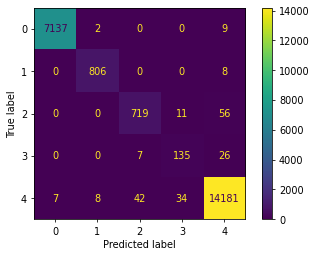

              precision    recall  f1-score   support

           0   0.999020  0.998461  0.998741      7148
           1   0.987745  0.990172  0.988957       814
           2   0.936198  0.914758  0.925354       786
           3   0.750000  0.803571  0.775862       168
           4   0.993067  0.993624  0.993345     14272

    accuracy                       0.990944     23188
   macro avg   0.933206  0.940117  0.936452     23188
weighted avg   0.991027  0.990944  0.990974     23188



,Class,Accuracy,F1_Score,Precision,Recall
0,0,0.998461,0.998741,0.999020,0.998461
1,1,0.990172,0.988957,0.987745,0.990172
2,2,0.914758,0.925354,0.936198,0.914758
3,3,0.803571,0.775862,0.750000,0.803571
4,4,0.993624,0.993345,0.993067,0.993624


In [94]:
X=df_pp[CORR_features]
y=df_pp.iloc[:,-1]

CORR_perf_df=model_performance(X,y)
CORR_perf_df

C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



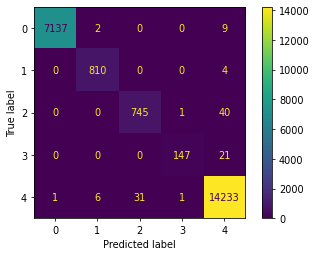

              precision    recall  f1-score   support

           0   0.999860  0.998461  0.999160      7148
           1   0.990220  0.995086  0.992647       814
           2   0.960052  0.947837  0.953905       786
           3   0.986577  0.875000  0.927445       168
           4   0.994828  0.997267  0.996046     14272

    accuracy                       0.994997     23188
   macro avg   0.986307  0.962730  0.973841     23188
weighted avg   0.994979  0.994997  0.994961     23188



,Class,Accuracy,F1_Score,Precision,Recall
0,0,0.998461,0.999160,0.999860,0.998461
1,1,0.995086,0.992647,0.990220,0.995086
2,2,0.947837,0.953905,0.960052,0.947837
3,3,0.875000,0.927445,0.986577,0.875000
4,4,0.997267,0.996046,0.994828,0.997267


In [95]:
X=df_pp[RFFI_features]
y=df_pp.iloc[:,-1]

RFFI_perf_df=model_performance(X,y)
RFFI_perf_df

C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



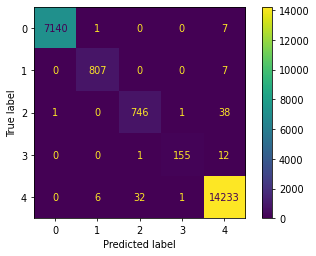

              precision    recall  f1-score   support

           0   0.999860  0.998881  0.999370      7148
           1   0.991400  0.991400  0.991400       814
           2   0.957638  0.949109  0.953355       786
           3   0.987261  0.922619  0.953846       168
           4   0.995524  0.997267  0.996395     14272

    accuracy                       0.995386     23188
   macro avg   0.986337  0.971855  0.978873     23188
weighted avg   0.995371  0.995386  0.995369     23188



,Class,Accuracy,F1_Score,Precision,Recall
0,0,0.998881,0.999370,0.999860,0.998881
1,1,0.991400,0.991400,0.991400,0.991400
2,2,0.949109,0.953355,0.957638,0.949109
3,3,0.922619,0.953846,0.987261,0.922619
4,4,0.997267,0.996395,0.995524,0.997267


In [96]:
X=df_pp[shap_features]
y=df_pp.iloc[:,-1]

SHAP_perf_df=model_performance(X,y)
SHAP_perf_df

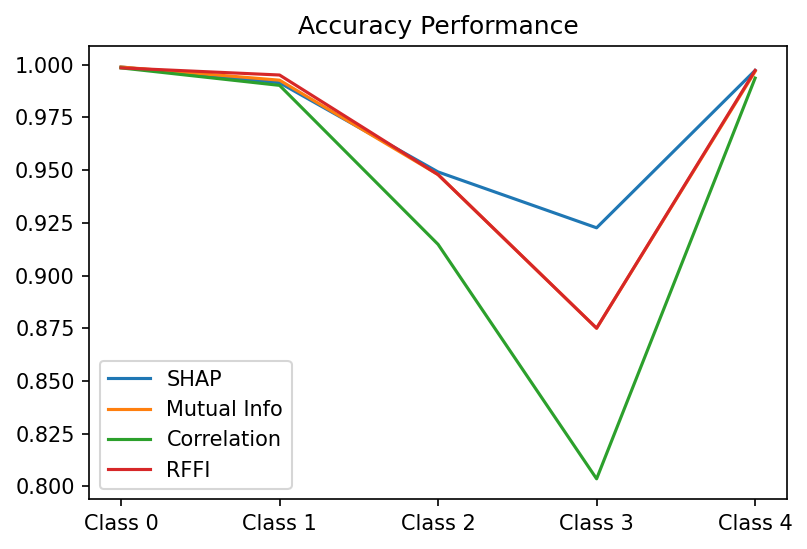

In [97]:
plt.rcParams['figure.dpi'] = 150
x = ['Class 0','Class 1','Class 2','Class 3','Class 4']
shap_acc = list(SHAP_perf_df['Accuracy'])
MI_acc = list(MI_perf_df['Accuracy'])
CORR_acc = list(CORR_perf_df['Accuracy'])
RFFI_acc = list(RFFI_perf_df['Accuracy'])

plt.plot(x, shap_acc, label = "SHAP")
plt.plot(x, MI_acc, label = "Mutual Info")
plt.plot(x, CORR_acc, label = "Correlation")
plt.plot(x, RFFI_acc, label = "RFFI")

plt.title('Accuracy Performance')
plt.legend()
plt.show()

In [98]:
import plotly.express as px

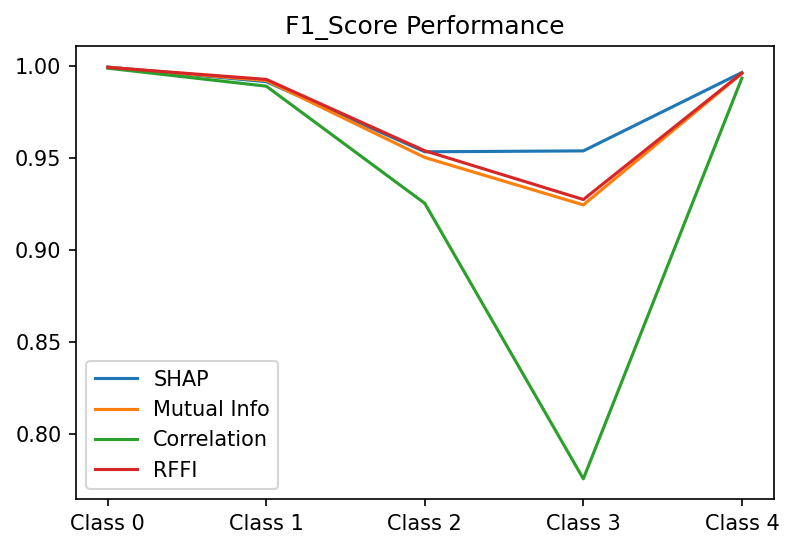

In [99]:
plt.rcParams['figure.dpi'] = 150
offset = 10

x = ['Class 0','Class 1','Class 2','Class 3','Class 4']
shap_acc = list(SHAP_perf_df['F1_Score'])
MI_acc = list(MI_perf_df['F1_Score'])
CORR_acc = list(CORR_perf_df['F1_Score'])
RFFI_acc = list(RFFI_perf_df['F1_Score'])

plt.plot(x, shap_acc, label = "SHAP")
plt.plot(x, MI_acc, label = "Mutual Info")


plt.plot(x, CORR_acc, label = "Correlation")

plt.plot(x, RFFI_acc, label = "RFFI")


plt.title('F1_Score Performance')
plt.legend()
plt.show()

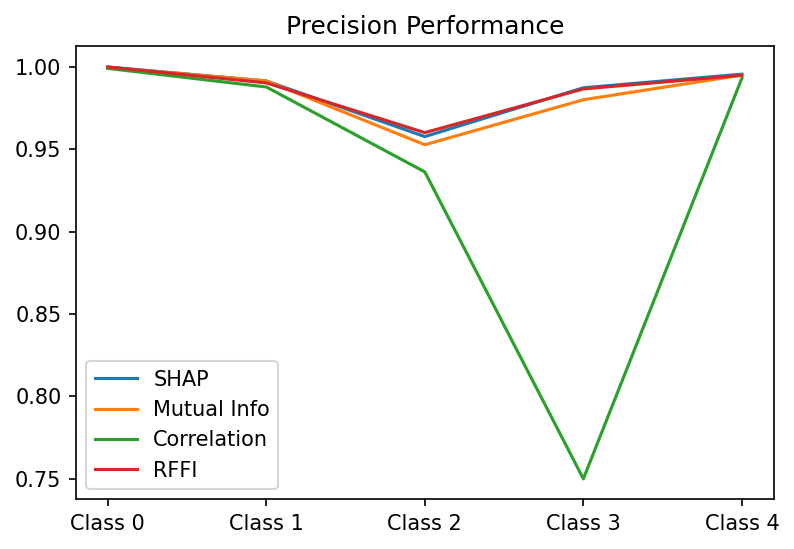

In [100]:
plt.rcParams['figure.dpi'] = 150
x = ['Class 0','Class 1','Class 2','Class 3','Class 4']
shap_acc = list(SHAP_perf_df['Precision'])
MI_acc = list(MI_perf_df['Precision'])
CORR_acc = list(CORR_perf_df['Precision'])
RFFI_acc = list(RFFI_perf_df['Precision'])

plt.plot(x, shap_acc, label = "SHAP")
plt.plot(x, MI_acc, label = "Mutual Info")
plt.plot(x, CORR_acc, label = "Correlation")
plt.plot(x, RFFI_acc, label = "RFFI")

plt.title('Precision Performance')
plt.legend()
plt.show()

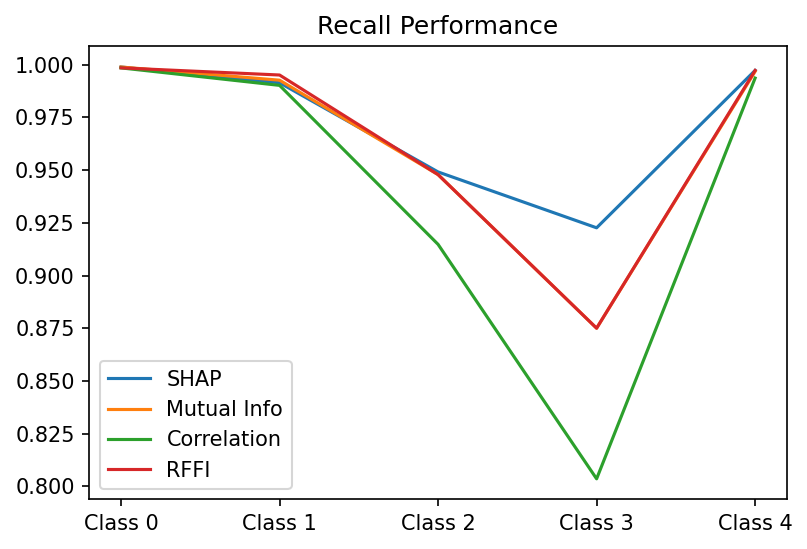

In [101]:
plt.rcParams['figure.dpi'] = 150
x = ['Class 0','Class 1','Class 2','Class 3','Class 4']
shap_acc = list(SHAP_perf_df['Recall'])
MI_acc = list(MI_perf_df['Recall'])
CORR_acc = list(CORR_perf_df['Recall'])
RFFI_acc = list(RFFI_perf_df['Recall'])

plt.plot(x, shap_acc, label = "SHAP")
plt.plot(x, MI_acc, label = "Mutual Info")
plt.plot(x, CORR_acc, label = "Correlation")
plt.plot(x, RFFI_acc, label = "RFFI")

plt.title('Recall Performance')
plt.legend()
plt.show()